<a href="https://colab.research.google.com/github/MounikaAnnapureddy/IT-496/blob/main/MounikaA_A11_PERT_CPM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from logging import critical
import pandas as pd
import tensorflow_probability as tfp
from collections import Counter

tfd = tfp.distributions

tasksDF=pd.read_csv("/content/drive/MyDrive/PERT-CPM.csv")
print(tasksDF)

   tasks     pred  best  mostL  worst
0      A      NaN     3      6      9
1      B      NaN     2      5      6
2      C        B     2      3      7
3      D      A,C     1      3      3
4      E        D     0      7      8
5      F        C     1      2     10
6      G        F     3      4     12
7      H        F     1      2     15
8      I        B     5     10     30
9      J  E, G, H     1      3      4
10   EOP      I,J     0      0      0


In [4]:
taskNames=tasksDF['tasks']

paths = [["A","D","E","J"], ["B","C","D","E","J"], ["B","D","F","G","J"], ["B","C","F","G","J"], ["B","C","F","H","J"], ["B","J"]]

simulationDF=pd.DataFrame(columns=taskNames)

#print(simulationDF.columns)

for index, task in tasksDF.iterrows():
  dist=tfd.PERT(low=task['best'], peak=task['mostL'], high=task['worst'], temperature=4)
  simulationDF[task['tasks']]=dist.sample(1000)
print(simulationDF.head(2))

tasks         A         B         C         D         E         F         G  \
0      6.449425  4.009919  2.890555  2.595492  5.609243  3.940888  3.869513   
1      5.259065  4.279106  3.957423  2.897198  3.423825  3.608880  6.394645   

tasks         H          I         J  EOP  
0      5.605597   7.528326  3.140870  NaN  
1      6.638458  22.842085  2.540538  NaN  


In [5]:
simulationDF.to_csv("/content/drive/MyDrive/simulationDataset.csv", index=False)

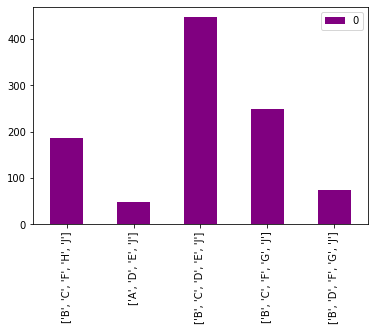

In [6]:
criticalPaths = []

for index in simulationDF.index:
  # Initialzie path lengths
  pathLengths = []

  for path in paths:
    pathLength = 0
    for task in path:
      pathLength+= simulationDF[task][index]
    pathLengths.append([str(path), pathLength])

  critical = pathLengths[0]

  for i in range(0,len(pathLengths)):
    # If the current path is longer than the current critical path, make it the new critical path
    if(pathLengths[i][1] > critical[1]):
      critical = pathLengths[i]

  criticalPaths.append(critical[0])
import matplotlib.pyplot as plt
# Plot a bar graph showing the frequency of each path
criticalPathCounts = Counter(criticalPaths)
df = pd.DataFrame.from_dict(criticalPathCounts, orient='index')
df.plot(color='purple', kind='bar')
